In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
def generate_shift_high_dim_dataset(n, d, p, seed):
    rng = np.random.RandomState(seed)
    us = rng.binomial(n=1, p=p, size=n).reshape(n, 1, 1)
    xs = rng.uniform(0.0, 1.0, size=(n*d)).reshape(n, d, 1)
    noise = rng.normal(0.0, 0.05, size=n).reshape(n, 1, 1)
    rng2 = np.random.RandomState(0)
    beta = rng2.uniform(-1., 1., size=d).reshape(d, 1)
    ys = np.matmul(beta.T, xs) +  0.5 * us + noise
    return xs, ys, us, beta

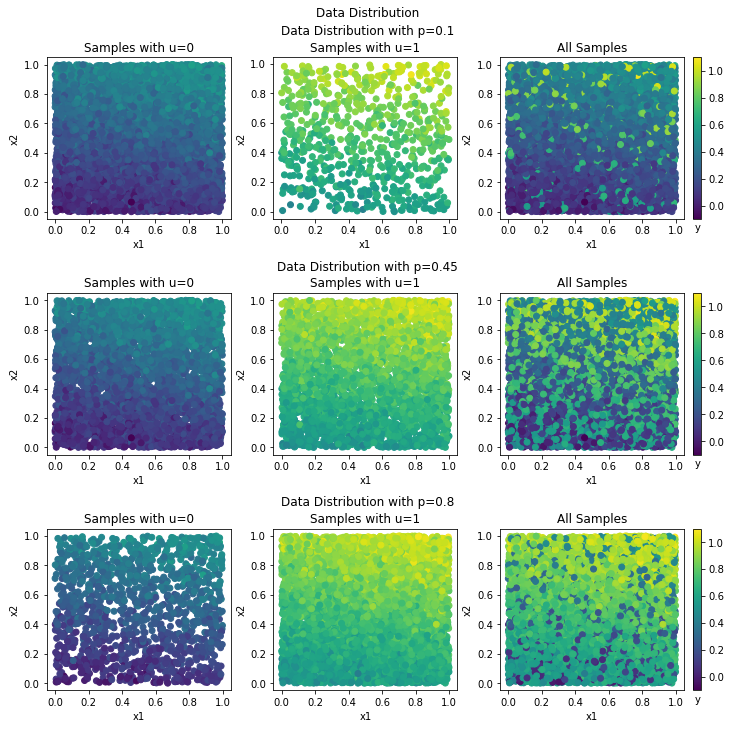

In [11]:
ps = np.linspace(0.1, 0.8, 3)
fig = plt.figure(constrained_layout=True, figsize=(10, 10))
subfigs = fig.subfigures(nrows=3, ncols=1)
fig.suptitle('Data Distribution')
for row, subfig in enumerate(subfigs):
    p = ps[row]
    subfig.suptitle('Data Distribution with p={}'.format(p.round(2)))
    
    xs, ys, us, _ = generate_shift_high_dim_dataset(7000, 2, p, 0)
    idx_0 = us.flatten() == 0
    idx_1 = us.flatten() == 1

    axs = subfig.subplots(nrows=1, ncols=3)
    axs[0].scatter(xs[idx_0, 0], xs[idx_0, 1], c=ys[idx_0, 0], vmin=-0.1, vmax=1.1)
    axs[1].scatter(xs[idx_1, 0], xs[idx_1, 1], c=ys[idx_1, 0], vmin=-0.1, vmax=1.1)
    im = axs[2].scatter(xs[:, 0], xs[:, 1], c=ys[:, 0], vmin=-0.1, vmax=1.1)
    cbar = subfig.colorbar(im)
    cbar.ax.set_xlabel("y", rotation=0)
    for i in range(3):
        axs[i].set_xlabel("x1")
        axs[i].set_ylabel("x2")
        axs[i].set_title("Samples with u={}".format(i))
    axs[2].set_title("All Samples")
plt.savefig("figs/data_dist_2_dim.pdf")

In [12]:
df = pd.read_csv("results/high_dim_large_test.csv")
df.groupby(["dataset", "method", "gamma", "p_train", "p_test"]).agg(["mean", "std"])["test_mse"]

mean       std
dataset          method        gamma p_train p_test                    
shifted_high_dim erm           1.0   0.100   0.100   0.025213  0.000631
                                     0.200   0.100   0.027867  0.000789
                                             0.275   0.054187  0.000929
                                             0.450   0.080448  0.002841
                                             0.625   0.106554  0.004322
                                             0.800   0.132825  0.006097
                                     0.275   0.275   0.052876  0.000648
                                     0.450   0.450   0.065042  0.000571
                                     0.625   0.625   0.061388  0.000579
                                     0.800   0.800   0.042675  0.000497
                 ru_regression 2.0   0.200   0.100   0.043240  0.001907
                                             0.275   0.054899  0.000812
                                             0.450   0.066570  0.000740
                                             0.625   0.077869  0.002163
                                             0.800   0.089489  0.003229
                               4.0   0.200   0.100   0.052765  0.002088
                                             0.275   0.058754  0.000976
                                             0.450   0.064791  0.000417
                                             0.625   0.070255  0.001100
                                             0.800   0.076232  0.002312
                               8.0   0.200   0.100   0.055902  0.001164
                                             0.275   0.060246  0.000615
                                             0.450   0.064645  0.000338
                                             0.625   0.068559  0.000663
                                             0.800   0.072896  0.001178
                               16.0  0.200   0.100   0.057839  0.000912
                                             0.275   0.061250  0.000493
                                             0.450   0.064708  0.000246
                                             0.625   0.067652  0.000399
                                             0.800   0.071040  0.000869

In [4]:
df = pd.read_csv("results/high_dim_16.csv")
df.groupby(["dataset", "method", "gamma", "p_train", "p_test"]).agg(["mean", "std"])["test_mse"]

mean       std
dataset          method        gamma p_train p_test                    
shifted_high_dim erm           1.0   0.100   0.100   0.025883  0.000347
                                     0.200   0.100   0.029061  0.001323
                                             0.275   0.055268  0.001069
                                             0.450   0.081141  0.003213
                                             0.625   0.106596  0.005250
                                             0.800   0.132725  0.007368
                                     0.275   0.275   0.054274  0.000505
                                     0.450   0.450   0.067216  0.000559
                                     0.625   0.625   0.063510  0.000593
                                     0.800   0.800   0.044380  0.000478
                 ru_regression 2.0   0.200   0.100   0.040794  0.002445
                                             0.275   0.054635  0.000922
                                             0.450   0.068346  0.000782
                                             0.625   0.081925  0.002687
                                             0.800   0.095723  0.004159
                               4.0   0.200   0.100   0.053589  0.003562
                                             0.275   0.059260  0.001650
                                             0.450   0.064893  0.000303
                                             0.625   0.070520  0.002081
                                             0.800   0.076181  0.004003
                               8.0   0.200   0.100   0.055456  0.002395
                                             0.275   0.060098  0.001062
                                             0.450   0.064770  0.000302
                                             0.625   0.069345  0.001155
                                             0.800   0.073993  0.002515
                               16.0  0.200   0.100   0.055481  0.003592
                                             0.275   0.060220  0.001856
                                             0.450   0.064877  0.000312
                                             0.625   0.069518  0.001922
                                             0.800   0.074168  0.003581

In [3]:
df = pd.read_csv("results/high_dim_16_n_small.csv")
df.groupby(["dataset", "method", "gamma", "p_train", "p_test"]).agg(["mean", "std"])["test_mse"]

FileNotFoundError: [Errno 2] No such file or directory: 'results/high_dim_16_n_small.csv'

In [29]:
df = pd.read_csv("results/high_dim_16_n_large_batch_large.csv")
df.groupby(["dataset", "method", "gamma", "p_train", "p_test"]).agg(["mean", "std"])["test_mse"]

mean  std
dataset          method gamma p_train p_test               
shifted_high_dim erm    1     0.100   0.100   0.024771  NaN
                              0.200   0.100   0.027519  NaN
                                      0.275   0.054551  NaN
                                      0.450   0.080958  NaN
                                      0.625   0.106471  NaN
                                      0.800   0.132824  NaN
                              0.275   0.275   0.053308  NaN
                              0.450   0.450   0.065189  NaN
                              0.625   0.625   0.062006  NaN
                              0.800   0.800   0.043141  NaN

In [3]:
df = pd.read_csv("results/high_dim_16_model_large_n_large.csv")
df.groupby(["dataset", "method", "gamma", "p_train", "p_test"]).agg(["mean", "std"])["test_mse"]

mean       std
dataset          method        gamma p_train p_test                    
shifted_high_dim erm           1.0   0.1     0.1     0.025398  0.000413
                                     0.2     0.1     0.027912  0.000654
                                             0.2     0.043265  0.000450
                                             0.5     0.088960  0.002788
                                             0.7     0.119003  0.003825
                                             0.9     0.149589  0.005528
                                     0.5     0.5     0.065666  0.000258
                                     0.7     0.7     0.055779  0.000234
                                     0.9     0.9     0.025463  0.000296
                 ru_regression 2.0   0.2     0.1     0.042065  0.004774
                                             0.2     0.049332  0.002882
                                             0.5     0.070874  0.002592
                                             0.7     0.085117  0.005900
                                             0.9     0.099537  0.009607
                               4.0   0.2     0.1     0.052447  0.001806
                                             0.2     0.055998  0.001241
                                             0.5     0.066493  0.000314
                                             0.7     0.073541  0.001424
                                             0.9     0.080522  0.002468
                               8.0   0.2     0.1     0.055504  0.005706
                                             0.2     0.058254  0.003853
                                             0.5     0.066265  0.001466
                                             0.7     0.071486  0.004786
                                             0.9     0.076875  0.008348
                               16.0  0.2     0.1     0.055926  0.003389
                                             0.2     0.058465  0.002319
                                             0.5     0.065986  0.000601
                                             0.7     0.070991  0.002478
                                             0.9     0.075999  0.004512